In [290]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [291]:
df= pd.read_csv('spam.csv')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Cleaning Data

In [292]:
df= df.iloc[:,:2]

In [293]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [294]:
df= df.rename(columns={'v1':'label', 'v2':'sms'})
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [296]:
df.shape

(5572, 2)

In [297]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

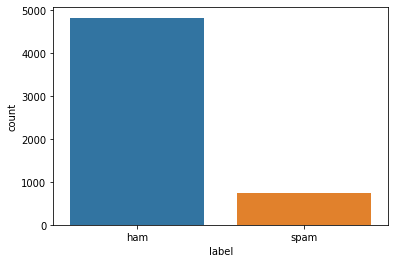

In [298]:
sns.countplot(df['label'])

#### Its clear that more than 85 % of messages are ham and only around 13 % messages are spam. So the data seems imbalanced

In [299]:
df.describe().T

,count,unique,top,freq
label,5572,2,ham,4825
sms,5572,5169,"Sorry, I'll call later",30


In [300]:
# creating a column that gives lengh of sms
df['text_length']= df['sms'].apply(len)

In [301]:
df.head()

,label,sms,text_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:xlabel='text_length', ylabel='Count'>

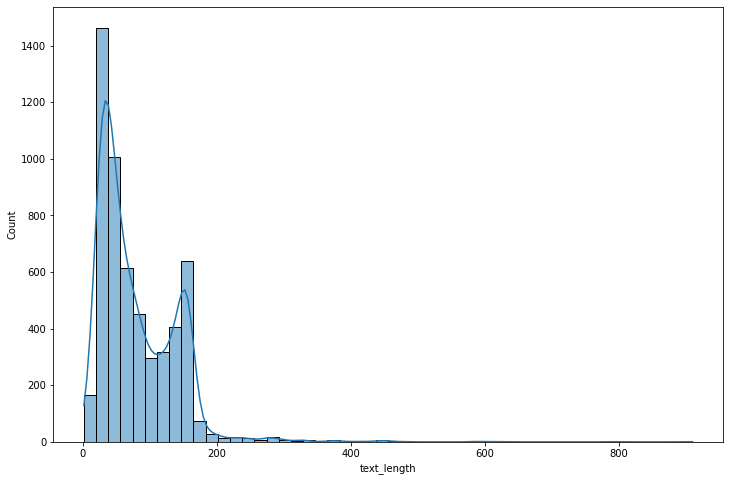

In [302]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='text_length', bins=50, kde=True)

#### Most of the message's length is round 0 and 200
#### There are few messages with large length ( above 200 )

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

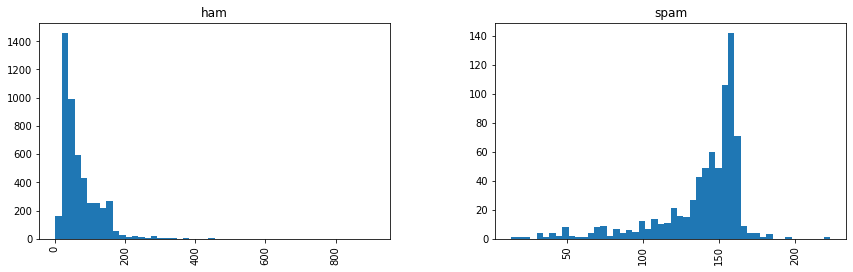

In [303]:
df.hist(column='text_length', by='label', bins=50,figsize=(14,4))

### Its clear that the length of the most ham messages is around 100 while spam messages is around 150

#### We need a way to represent text data for machine learning algorithm and the bag-of-words model helps us to achieve that task. It is a way of extracting features from the text for use in machine learning algorithms.

#### In this approach, we use the tokenized words for each observation and find out the frequency of each token.

#### Using a process which we will go through now, we can convert a collection of documents to a matrix, with each document being a row and each word(token) being the column, and the corresponding (row,column) values being the frequency of occurrence of each word or token in that document

### Our objective here is to convert this set of text or messages to a frequency distribution matrix

### To handle this, we will be using sklearns count vectorizer method which does the following:

### 1) It tokenizes the string(separates the string into individual words) and gives an integer ID to each token.
### 2) It counts the occurrence of each of those tokens

## Implementation of Bag of Words Approach

In [304]:
lem= WordNetLemmatizer()
def message_text_process(mess):
    # lowercase letters
    lowered_doc= [d.lower() for d in mess]
    # removing all punctuation
    no_punctuation = [char for char in lowered_doc if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    # removing all chars except alphabets
    no_punctuation= re.sub('[^a-zA-Z]',' ',no_punctuation)
    # token, lowering letters and removing stop words
    return [lem.lemmatize(word) for word in no_punctuation.split() if word.lower() 
            not in stopwords.words('english')]

In [305]:
df['sms'].head(5).apply(message_text_process)

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, wkly, comp, win, fa, cup, final,...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, go, usf, life, around, though]
Name: sms, dtype: object

In [306]:
df

,label,sms,text_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will �_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [307]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['sms'], 
                                                    df['label'],test_size=0.20, 
                                                    random_state=1)

In [308]:
print(X_train.shape, X_test.shape)

(4457,) (1115,)


In [309]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(analyzer=message_text_process)

In [310]:
count_vector.fit(X_train)

CountVectorizer(analyzer=<function message_text_process at 0x14a10aa70>)

In [311]:
print(len(count_vector.vocabulary_))

6948


In [312]:
print(count_vector.get_feature_names())

['aah', 'aaooooright', 'aathilove', 'aathiwhere', 'ab', 'abbey', 'abdomen', 'abeg', 'abel', 'aberdeen', 'abi', 'ability', 'abiola', 'abj', 'able', 'abnormally', 'aboutas', 'abroad', 'absolutely', 'abstract', 'abt', 'abta', 'aburo', 'abuse', 'abuser', 'ac', 'academic', 'acc', 'accent', 'accenture', 'accept', 'access', 'accessible', 'accidant', 'accident', 'accidentally', 'accommodation', 'accommodationvouchers', 'accomodate', 'accomodations', 'accordin', 'accordingly', 'account', 'accounting', 'accumulation', 'achanammarakheshqatar', 'ache', 'acid', 'acl', 'acnt', 'acoentry', 'across', 'acsmsrewards', 'acted', 'actin', 'acting', 'action', 'activ', 'activate', 'active', 'activity', 'actor', 'actual', 'actually', 'acwicmb', 'ad', 'adam', 'add', 'addamsfa', 'added', 'addicted', 'addie', 'adding', 'address', 'addressull', 'adi', 'adjustable', 'admin', 'administrator', 'admirer', 'admission', 'adore', 'adoring', 'adp', 'adress', 'adrian', 'adsense', 'adult', 'advance', 'adventure', 'adventur

In [313]:
traning_data=count_vector.transform(X_train)
testing_data= count_vector.transform(X_test)

In [315]:
traning_data.shape

(4457, 6948)

## Modelling 

In [316]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(traning_data,y_train)

MultinomialNB()

In [317]:
predictions = naive_bayes.predict(testing_data)

In [318]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
score= classification_report(y_test, predictions)
print(score)

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       976
        spam       0.95      0.94      0.94       139

    accuracy                           0.99      1115
   macro avg       0.97      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [319]:
print(confusion_matrix(y_test, predictions))

[[969   7]
 [  9 130]]


In [320]:
train_pred= naive_bayes.predict(traning_data)

In [321]:
score_train= classification_report(y_train, train_pred)
print(score_train)

              precision    recall  f1-score   support

         ham       1.00      0.99      0.99      3849
        spam       0.96      0.97      0.96       608

    accuracy                           0.99      4457
   macro avg       0.98      0.98      0.98      4457
weighted avg       0.99      0.99      0.99      4457

